# 微积分
:label:`sec_calculus`

在2500年前，古希腊人把一个多边形分成三角形，并把它们的面积相加，才找到计算多边形面积的方法。
为了求出曲线形状（比如圆）的面积，古希腊人在这样的形状上刻内接多边形。
如 :numref:`fig_circle_area`所示，内接多边形的等长边越多，就越接近圆。
这个过程也被称为*逼近法*（method of exhaustion）。

![用逼近法求圆的面积](../img/polygon-circle.svg)
:label:`fig_circle_area`

事实上，逼近法就是*积分*（integral calculus）的起源。
2000多年后，微积分的另一支，*微分*（differential calculus）被发明出来。
在微分学最重要的应用是优化问题，即考虑如何把事情做到最好。
正如在 :numref:`subsec_norms_and_objectives`中讨论的那样，
这种问题在深度学习中是无处不在的。

在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。
通常情况下，变得更好意味着最小化一个*损失函数*（loss function），
即一个衡量“模型有多糟糕”这个问题的分数。
最终，我们真正关心的是生成一个模型，它能够在从未见过的数据上表现良好。
但“训练”模型只能将模型与我们实际能看到的数据相拟合。
因此，我们可以将拟合模型的任务分解为两个关键问题：

* *优化*（optimization）：用模型拟合观测数据的过程；
* *泛化*（generalization）：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型。

为了帮助读者在后面的章节中更好地理解优化问题和方法，
本节提供了一个非常简短的入门教程，帮助读者快速掌握深度学习中常用的微分知识。

## 导数和微分

我们首先讨论导数的计算，这是几乎所有深度学习优化算法的关键步骤。
在深度学习中，我们通常选择对于模型参数可微的损失函数。
简而言之，对于每个参数，
如果我们把这个参数*增加*或*减少*一个无穷小的量，可以知道损失会以多快的速度增加或减少，

假设我们有一个函数$f: \mathbb{R} \rightarrow \mathbb{R}$，其输入和输出都是标量。
(**如果$f$的*导数*存在，这个极限被定义为**)

(**$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$**)
:eqlabel:`eq_derivative`

如果$f'(a)$存在，则称$f$在$a$处是*可微*（differentiable）的。
如果$f$在一个区间内的每个数上都是可微的，则此函数在此区间中是可微的。
我们可以将 :eqref:`eq_derivative`中的导数$f'(x)$解释为$f(x)$相对于$x$的*瞬时*（instantaneous）变化率。
所谓的瞬时变化率是基于$x$中的变化$h$，且$h$接近$0$。

为了更好地解释导数，让我们做一个实验。
(**定义$u=f(x)=3x^2-4x$**)如下：


In [3]:
%matplotlib inline
import numpy as np
from matplotlib_inline import backend_inline
# from d2l import torch as d2l


def f(x):
    return 3 * x ** 2 - 4 * x

[**通过令$x=1$并让$h$接近$0$，**] :eqref:`eq_derivative`中(**$\frac{f(x+h)-f(x)}{h}$的数值结果接近$2$**)。
虽然这个实验不是一个数学证明，但稍后会看到，当$x=1$时，导数$u'$是$2$。


In [4]:
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

h = 0.1
for i in range(5):
    print(f'h={h:.5f}, numerical limit={numerical_lim(f, 1, h):.5f}')
    h *= 0.1

h=0.10000, numerical limit=2.30000
h=0.01000, numerical limit=2.03000
h=0.00100, numerical limit=2.00300
h=0.00010, numerical limit=2.00030
h=0.00001, numerical limit=2.00003


让我们熟悉一下导数的几个等价符号。
给定$y=f(x)$，其中$x$和$y$分别是函数$f$的自变量和因变量。以下表达式是等价的：

$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$

其中符号$\frac{d}{dx}$和$D$是*微分运算符*，表示*微分*操作。
我们可以使用以下规则来对常见函数求微分：

* $DC = 0$（$C$是一个常数）
* $Dx^n = nx^{n-1}$（*幂律*（power rule），$n$是任意实数）
* $De^x = e^x$
* $D\ln(x) = 1/x$

为了微分一个由一些常见函数组成的函数，下面的一些法则方便使用。
假设函数$f$和$g$都是可微的，$C$是一个常数，则：

*常数相乘法则*
$$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$

*加法法则*

$$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$

*乘法法则*

$$\frac{d}{dx} [f(x)g(x)] = f(x) \frac{d}{dx} [g(x)] + g(x) \frac{d}{dx} [f(x)],$$

*除法法则*

$$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$

现在我们可以应用上述几个法则来计算$u'=f'(x)=3\frac{d}{dx}x^2-4\frac{d}{dx}x=6x-4$。
令$x=1$，我们有$u'=2$：在这个实验中，数值结果接近$2$，
这一点得到了在本节前面的实验的支持。
当$x=1$时，此导数也是曲线$u=f(x)$切线的斜率。

[**为了对导数的这种解释进行可视化，我们将使用`matplotlib`**]，
这是一个Python中流行的绘图库。
要配置`matplotlib`生成图形的属性，我们需要(**定义几个函数**)。
在下面，`use_svg_display`函数指定`matplotlib`软件包输出svg图表以获得更清晰的图像。

注意，注释`#@save`是一个特殊的标记，会将对应的函数、类或语句保存在`d2l`包中。
因此，以后无须重新定义就可以直接调用它们（例如，`d2l.use_svg_display()`）。


In [5]:
def use_svg_display():  #@save
    """使用svg格式在Jupyter中显示绘图"""
    backend_inline.set_matplotlib_formats('svg')

我们定义`set_figsize`函数来设置图表大小。
注意，这里可以直接使用`d2l.plt`，因为导入语句
`from matplotlib import pyplot as plt`已标记为保存到`d2l`包中。


In [6]:
#@save
import collections
import hashlib
import math
import os
import random
import re
import shutil
import sys
import tarfile
import time
import zipfile
from collections import defaultdict
import pandas as pd
import requests
from IPython import display
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline

d2l = sys.modules[__name__]

def set_figsize(figsize=(3.5, 2.5)):  #@save
    """设置matplotlib的图表大小"""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

下面的`set_axes`函数用于设置由`matplotlib`生成图表的轴的属性。


In [8]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """设置matplotlib的轴"""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

通过这三个用于图形配置的函数，定义一个`plot`函数来简洁地绘制多条曲线，
因为我们需要在整个书中可视化许多曲线。


In [9]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

现在我们可以[**绘制函数$u=f(x)$及其在$x=1$处的切线$y=2x-3$**]，
其中系数$2$是切线的斜率。


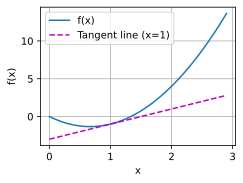

In [10]:
x = np.arange(0, 3, 0.1)
plot(x, [f(x), 2 * x - 3], 'x', 'f(x)', legend=['f(x)', 'Tangent line (x=1)'])

## 偏导数

到目前为止，我们只讨论了仅含一个变量的函数的微分。
在深度学习中，函数通常依赖于许多变量。
因此，我们需要将微分的思想推广到*多元函数*（multivariate function）上。

设$y = f(x_1, x_2, \ldots, x_n)$是一个具有$n$个变量的函数。
$y$关于第$i$个参数$x_i$的*偏导数*（partial derivative）为：

$$ \frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

为了计算$\frac{\partial y}{\partial x_i}$，
我们可以简单地将$x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$看作常数，
并计算$y$关于$x_i$的导数。
对于偏导数的表示，以下是等价的：

$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

## 梯度
:label:`subsec_calculus-grad`

我们可以连结一个多元函数对其所有变量的偏导数，以得到该函数的*梯度*（gradient）向量。
具体而言，设函数$f:\mathbb{R}^n\rightarrow\mathbb{R}$的输入是
一个$n$维向量$\mathbf{x}=[x_1,x_2,\ldots,x_n]^\top$，并且输出是一个标量。
函数$f(\mathbf{x})$相对于$\mathbf{x}$的梯度是一个包含$n$个偏导数的向量:

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\bigg]^\top,$$

其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在没有歧义时被$\nabla f(\mathbf{x})$取代。

假设$\mathbf{x}$为$n$维向量，在微分多元函数时经常使用以下规则:

* 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A}  = \mathbf{A}$
* 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$，都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x}  = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
* $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$

同样，对于任何矩阵$\mathbf{X}$，都有$\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$。
正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很大用处。

## 链式法则

然而，上面方法可能很难找到梯度。
这是因为在深度学习中，多元函数通常是*复合*（composite）的，
所以难以应用上述任何规则来微分这些函数。
幸运的是，链式法则可以被用来微分复合函数。

让我们先考虑单变量函数。假设函数$y=f(u)$和$u=g(x)$都是可微的，根据链式法则：

$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$

现在考虑一个更一般的场景，即函数具有任意数量的变量的情况。
假设可微分函数$y$有变量$u_1, u_2, \ldots, u_m$，其中每个可微分函数$u_i$都有变量$x_1, x_2, \ldots, x_n$。
注意，$y$是$x_1, x_2， \ldots, x_n$的函数。
对于任意$i = 1, 2, \ldots, n$，链式法则给出：

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + \frac{\partial y}{\partial u_2} \frac{\partial u_2}{\partial x_i} + \cdots + \frac{\partial y}{\partial u_m} \frac{\partial u_m}{\partial x_i}$$

## 小结

* 微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。
* 导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率。
* 梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。
* 链式法则可以用来微分复合函数。

## 练习

1. 绘制函数$y = f(x) = x^3 - \frac{1}{x}$和其在$x = 1$处切线的图像。
1. 求函数$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。
1. 函数$f(\mathbf{x}) = \|\mathbf{x}\|_2$的梯度是什么？
1. 尝试写出函数$u = f(x, y, z)$，其中$x = x(a, b)$，$y = y(a, b)$，$z = z(a, b)$的链式法则。


1.绘制函数$y = f(x) = x^3 - \frac{1}{x}$和其在$x = 1$处切线的图像。

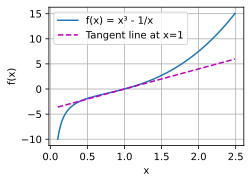

在 x = 1 处:
f(1) = 0.0
f'(1) ≈ 4.00002 (使用数值方法计算)
f'(1) = 4.0 (解析解)


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline

# 设置matplotlib显示svg格式图像
def use_svg_display():
    backend_inline.set_matplotlib_formats('svg')

# 设置图表大小
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

# 设置坐标轴
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()

# 绘图函数
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else plt.gca()

    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

# 定义函数 f(x) = x^3 - 1/x
def f(x):
    return x**3 - 1/x

# 计算在 x=1 处的导数（数值方法）
def numerical_lim(f, x, h):
    return (f(x + h) - f(x)) / h

# 使用很小的h来近似计算导数
h = 1e-5
x_at = 1
slope = numerical_lim(f, x_at, h)

# 计算 x=1 处的函数值
y_at = f(x_at)

# 切线方程: y - y1 = m(x - x1) => y = m(x - x1) + y1
# 其中 m 是斜率，(x1, y1) 是切点
def tangent_line(x):
    # return 3 * x ** 2 + x ** -2
    return 4 * x - 4

# 生成x值，避开x=0（因为原函数在x=0处未定义）
x = np.arange(0.1, 2.5, 0.01)

# 绘制函数和切线
plot(x, [f(x), tangent_line(x)], 'x', 'f(x)', 
     legend=['f(x) = x³ - 1/x', f'Tangent line at x={x_at}'])
plt.show()

# 打印计算结果
print(f"在 x = {x_at} 处:")
print(f"f({x_at}) = {y_at}")
print(f"f'({x_at}) ≈ {slope:.5f} (使用数值方法计算)")

# 解析计算导数
# f(x) = x^3 - 1/x = x^3 - x^(-1)
# f'(x) = 3x^2 - (-1)x^(-2) = 3x^2 + x^(-2) = 3x^2 + 1/x^2
def f_prime(x):
    return 3*x**2 + 1/x**2

analytical_slope = f_prime(1)
print(f"f'({x_at}) = {analytical_slope} (解析解)")

2.求函数$f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$的梯度。

我需要求函数 $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$ 的梯度。

根据梯度的定义，对于函数 $f:\mathbb{R}^n \rightarrow \mathbb{R}$，其梯度是一个向量，包含所有偏导数：

$$\nabla_{\mathbf{x}} f(\mathbf{x}) = \left[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_n}\right]^\top$$

对于函数 $f(\mathbf{x}) = 3x_1^2 + 5e^{x_2}$，我需要计算关于 $x_1$ 和 $x_2$ 的偏导数。

计算 $\frac{\partial f}{\partial x_1}$： $$\frac{\partial f}{\partial x_1} = \frac{\partial}{\partial x_1}(3x_1^2 + 5e^{x_2}) = 6x_1$$

计算 $\frac{\partial f}{\partial x_2}$： $$\frac{\partial f}{\partial x_2} = \frac{\partial}{\partial x_2}(3x_1^2 + 5e^{x_2}) = 5e^{x_2}$$

因此，函数的梯度为：

$$\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \ \frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix} 6x_1 \ 5e^{x_2} \end{bmatrix}$$

In [19]:
import sympy as sp

# 定义变量
x1, x2 = sp.symbols('x1 x2')

# 定义函数
f = 3*x1**2 + 5*sp.exp(x2)

# 计算偏导数
df_dx1 = sp.diff(f, x1)
df_dx2 = sp.diff(f, x2)

print(f"函数 f(x1, x2) = {f}")
print(f"∂f/∂x1 = {df_dx1}")
print(f"∂f/∂x2 = {df_dx2}")
print(f"梯度 ∇f(x) = [{df_dx1}, {df_dx2}]")

# 验证数值计算
import numpy as np

def f(x1, x2):
    return 3*x1**2 + 5*np.exp(x2)

def gradient_f(x1, x2):
    return np.array([6*x1, 5*np.exp(x2)])

# 在几个点上验证
test_points = [(0, 0), (1, 1), (2, 0), (-1, 1)]

for x1, x2 in test_points:
    grad = gradient_f(x1, x2)
    print(f"在点 ({x1}, {x2}) 处:")
    print(f"  f({x1}, {x2}) = {f(x1, x2):.4f}")
    print(f"  梯度 = [{grad[0]:.4f}, {grad[1]:.4f}]")
    print()

函数 f(x1, x2) = 3*x1**2 + 5*exp(x2)
∂f/∂x1 = 6*x1
∂f/∂x2 = 5*exp(x2)
梯度 ∇f(x) = [6*x1, 5*exp(x2)]
在点 (0, 0) 处:
  f(0, 0) = 5.0000
  梯度 = [0.0000, 5.0000]

在点 (1, 1) 处:
  f(1, 1) = 16.5914
  梯度 = [6.0000, 13.5914]

在点 (2, 0) 处:
  f(2, 0) = 17.0000
  梯度 = [12.0000, 5.0000]

在点 (-1, 1) 处:
  f(-1, 1) = 16.5914
  梯度 = [-6.0000, 13.5914]



3.函数$f(\mathbf{x}) = \|\mathbf{x}\|_2$的梯度是什么？

我需要求函数 $f(\mathbf{x}) = |\mathbf{x}|_2$ 的梯度。

首先，让我们明确这个函数的定义。函数 $f(\mathbf{x}) = |\mathbf{x}|_2$ 是向量 $\mathbf{x}$ 的欧几里得范数（或L2范数），其中 $\mathbf{x} = [x_1, x_2, \ldots, x_n]^\top$。

欧几里得范数定义为： $$|\mathbf{x}|2 = \sqrt{x_1^2 + x_2^2 + \cdots + x_n^2} = \sqrt{\sum{i=1}^n x_i^2}$$

所以函数可以写成： $$f(\mathbf{x}) = |\mathbf{x}|2 = \left(\sum{i=1}^n x_i^2\right)^{1/2}$$

现在我需要计算这个函数关于每个变量 $x_i$ 的偏导数。

对于 $\frac{\partial f}{\partial x_i}$，我使用链式法则：

$$\frac{\partial f}{\partial x_i} = \frac{\partial}{\partial x_i} \left(\sum_{j=1}^n x_j^2\right)^{1/2}$$

设 $u = \sum_{j=1}^n x_j^2$，则 $f = u^{1/2}$。

根据链式法则： $$\frac{\partial f}{\partial x_i} = \frac{df}{du} \cdot \frac{\partial u}{\partial x_i}$$

计算各部分：

$\frac{df}{du} = \frac{1}{2}u^{-1/2} = \frac{1}{2}\left(\sum_{j=1}^n x_j^2\right)^{-1/2} = \frac{1}{2|\mathbf{x}|_2}$
$\frac{\partial u}{\partial x_i} = \frac{\partial}{\partial x_i} \sum_{j=1}^n x_j^2 = 2x_i$
因此： $$\frac{\partial f}{\partial x_i} = \frac{1}{2|\mathbf{x}|_2} \cdot 2x_i = \frac{x_i}{|\mathbf{x}|_2}$$

对于所有 $i = 1, 2, \ldots, n$，都有： $$\frac{\partial f}{\partial x_i} = \frac{x_i}{|\mathbf{x}|_2}$$

因此，梯度向量为： $$\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \ \frac{\partial f}{\partial x_2} \ \vdots \ \frac{\partial f}{\partial x_n} \end{bmatrix} = \begin{bmatrix} \frac{x_1}{|\mathbf{x}|_2} \ \frac{x_2}{|\mathbf{x}|_2} \ \vdots \ \frac{x_n}{|\mathbf{x}|_2} \end{bmatrix} = \frac{1}{|\mathbf{x}|_2} \begin{bmatrix} x_1 \ x_2 \ \vdots \ x_n \end{bmatrix} = \frac{\mathbf{x}}{|\mathbf{x}|_2}$$

让我用Python和SymPy来验证这个结果：

In [20]:
import sympy as sp
import numpy as np

# 先用2维情况验证
x1, x2 = sp.symbols('x1 x2')
x = sp.Matrix([x1, x2])
norm_x = sp.sqrt(x1**2 + x2**2)

print("函数 f(x) = ||x||_2 =", norm_x)

# 计算偏导数
df_dx1 = sp.diff(norm_x, x1)
df_dx2 = sp.diff(norm_x, x2)

print("∂f/∂x1 =", df_dx1)
print("∂f/∂x2 =", df_dx2)
print("梯度 ∇f(x) =", sp.Matrix([df_dx1, df_dx2]))

# 验证梯度等于 x/||x||
expected_gradient = x / norm_x
print("x/||x|| =", expected_gradient)
print("验证结果是否一致:", sp.simplify(sp.Matrix([df_dx1, df_dx2]) - expected_gradient) == sp.Matrix([0, 0]))

# 数值验证
def f(x1, x2):
    return np.sqrt(x1**2 + x2**2)

def gradient_f(x1, x2):
    norm = np.sqrt(x1**2 + x2**2)
    return np.array([x1/norm, x2/norm])

# 在几个非零点上测试
test_points = [(1, 1), (3, 4), (-1, 2), (2, -3)]

for x1, x2 in test_points:
    grad = gradient_f(x1, x2)
    norm = f(x1, x2)
    print(f"在点 ({x1}, {x2}) 处:")
    print(f"  f({x1}, {x2}) = {norm:.4f}")
    print(f"  梯度 = [{grad[0]:.4f}, {grad[1]:.4f}]")
    print(f"  x/||x|| = [{x1/norm:.4f}, {x2/norm:.4f}]")
    print()

函数 f(x) = ||x||_2 = sqrt(x1**2 + x2**2)
∂f/∂x1 = x1/sqrt(x1**2 + x2**2)
∂f/∂x2 = x2/sqrt(x1**2 + x2**2)
梯度 ∇f(x) = Matrix([[x1/sqrt(x1**2 + x2**2)], [x2/sqrt(x1**2 + x2**2)]])
x/||x|| = Matrix([[x1/sqrt(x1**2 + x2**2)], [x2/sqrt(x1**2 + x2**2)]])
验证结果是否一致: True
在点 (1, 1) 处:
  f(1, 1) = 1.4142
  梯度 = [0.7071, 0.7071]
  x/||x|| = [0.7071, 0.7071]

在点 (3, 4) 处:
  f(3, 4) = 5.0000
  梯度 = [0.6000, 0.8000]
  x/||x|| = [0.6000, 0.8000]

在点 (-1, 2) 处:
  f(-1, 2) = 2.2361
  梯度 = [-0.4472, 0.8944]
  x/||x|| = [-0.4472, 0.8944]

在点 (2, -3) 处:
  f(2, -3) = 3.6056
  梯度 = [0.5547, -0.8321]
  x/||x|| = [0.5547, -0.8321]



4.尝试写出函数$u = f(x, y, z)$，其中$x = x(a, b)$，$y = y(a, b)$，$z = z(a, b)$的链式法则。

需要为给定的复合函数写出链式法则。

给定：

$u = f(x, y, z)$，其中 $f$ 是一个三元函数
$x = x(a, b)$，$y = y(a, b)$，$z = z(a, b)$，即 $x, y, z$ 都是关于变量 $a, b$ 的函数
这是一个典型的多变量复合函数情形，需要使用链式法则来计算偏导数。

对于 $\frac{\partial u}{\partial a}$ 的链式法则：
根据链式法则，当 $u$ 通过中间变量 $x, y, z$ 依赖于 $a$ 时：

$$\frac{\partial u}{\partial a} = \frac{\partial u}{\partial x}\frac{\partial x}{\partial a} + \frac{\partial u}{\partial y}\frac{\partial y}{\partial a} + \frac{\partial u}{\partial z}\frac{\partial z}{\partial a}$$

对于 $\frac{\partial u}{\partial b}$ 的链式法则：
同样地，当 $u$ 通过中间变量 $x, y, z$ 依赖于 $b$ 时：

$$\frac{\partial u}{\partial b} = \frac{\partial u}{\partial x}\frac{\partial x}{\partial b} + \frac{\partial u}{\partial y}\frac{\partial y}{\partial b} + \frac{\partial u}{\partial z}\frac{\partial z}{\partial b}$$

解释
这些公式遵循链式法则的一般形式。当一个函数 $u$ 依赖于多个中间变量 $x, y, z$，而这些中间变量又依赖于基础变量 $a, b$ 时，$u$ 对基础变量的偏导数等于所有路径贡献的总和。

具体来说：

$u$ 对 $a$ 的变化率是通过 $x, y, z$ 三个路径的贡献之和
每个路径的贡献等于：$u$ 对该中间变量的偏导数 乘以 该中间变量对 $a$ 的偏导数


In [24]:
import sympy as sp

# 定义符号变量
a, b = sp.symbols('a b')
x, y, z = sp.symbols('x y z')
u = sp.symbols('u')

# 定义具体的函数关系作为例子
# 假设: u = x^2 + y^2 + z^2, 其中 x = a*b, y = a+b, z = a-b
x_func = a * b
y_func = a + b
z_func = a - b
u_func = x**2 + y**2 + z**2

# 直接计算 u 对 a 的偏导数 (将 x, y, z 用 a, b 表达)
u_direct = u_func.subs([(x, x_func), (y, y_func), (z, z_func)])
du_da_direct = sp.diff(u_direct, a)

# 使用链式法则计算
du_dx = sp.diff(u_func, x)  # 2*x
du_dy = sp.diff(u_func, y)  # 2*y
du_dz = sp.diff(u_func, z)  # 2*z

dx_da = sp.diff(x_func, a)  # b
dy_da = sp.diff(y_func, a)  # 1
dz_da = sp.diff(z_func, a)  # 1

# 链式法则
du_da_chain = du_dx * dx_da + du_dy * dy_da + du_dz * dz_da
du_da_chain = du_da_chain.subs([(x, x_func), (y, y_func), (z, z_func)])


# 验证两种方法结果一致
print("直接计算:")
print(du_da_direct)
print("\n链式法则:")
print(du_da_chain)
print("\n两者是否相等:", sp.simplify(du_da_direct - du_da_chain) == 0)

# 对于 b 的情况
du_db_direct = sp.diff(u_direct, b)
dx_db = sp.diff(x_func, b)  # a
dy_db = sp.diff(y_func, b)  # 1
dz_db = sp.diff(z_func, b)  # -1

du_db_chain = du_dx * dx_db + du_dy * dy_db + du_dz * dz_db
du_db_chain = du_db_chain.subs([(x, x_func), (y, y_func), (z, z_func)])

print("\n\n对 b 的偏导数:")
print("直接计算:")
print(du_db_direct)
print("\n链式法则:")
print(du_db_chain)
print("\n两者是否相等:", sp.simplify(du_db_direct - du_db_chain) == 0)

直接计算:
2*a*b**2 + 4*a

链式法则:
2*a*b**2 + 4*a

两者是否相等: True


对 b 的偏导数:
直接计算:
2*a**2*b + 4*b

链式法则:
2*a**2*b + 4*b

两者是否相等: True


[Discussions](https://discuss.d2l.ai/t/1756)
